In [1]:
import xlrd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import math
import re
from sklearn.utils import shuffle
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

In [3]:
DATA_SET=pd.read_csv('C:\\Datasets\\Uswe\\DATA.csv')

In [4]:
#train=DATA_SET.iloc[:int(0.98*len(DATA_SET)),:]
#test=DATA_SET.iloc[int(0.98*len(DATA_SET)):,:]

In [5]:
#del DATA_SET

In [6]:
DATA_SET.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [7]:
#test.columns = ['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)','TimeZone','AirportCode','LocationLat','LocationLng','City','County','State','ZipCode']
#train.head()

In [8]:
FDATA_SET=DATA_SET.dropna()

In [9]:
del DATA_SET

In [10]:
#Calculating time taken in journey,year and month as they play an important factor in classifiying the weather.

In [ ]:
import datetime as dt
import warnings
start = pd.DatetimeIndex(FDATA_SET['StartTime(UTC)'])
end = pd.DatetimeIndex(FDATA_SET['EndTime(UTC)'])
FDATA_SET['Mean_Duration'] = (end-start).total_seconds()
FDATA_SET['Year'] = start.year
FDATA_SET['Month'] = start.month


In [ ]:
#FDATA_SET['output']=FDATA_SET[['Type', 'Severity']].agg('-'.join, axis=1)
FDATA_SET['output']=FDATA_SET['Type'].astype(str) + FDATA_SET['Severity'].astype(str)

In [ ]:
FDATA_SET.head()

In [ ]:
for i in ['State','City','AirportCode','County','output']:
    FDATA_SET[i] = FDATA_SET[i].astype('category')
    FDATA_SET[i] = FDATA_SET[i].cat.codes

In [ ]:
pd.crosstab(FDATA_SET['City'],FDATA_SET['LocationLat'])

In [ ]:
pd.crosstab(FDATA_SET['City'],FDATA_SET['ZipCode'])

In [ ]:
pd.crosstab(FDATA_SET['City'],FDATA_SET['AirportCode'])

In [ ]:
#removing city as weather usually have same effect on cities in the same county
#removing start time and end time because duration, month and year have already been calculated
#removing type and severity as they have already been combined and added

In [31]:
FDATA_SET=FDATA_SET.drop(['EventId','StartTime(UTC)','EndTime(UTC)','Type','Severity','TimeZone','City'],axis = 1)

NameError: name 'FDATA_SET' is not defined

In [21]:
train=FDATA_SET.iloc[:int(0.98*len(FDATA_SET)),:]
test=FDATA_SET.iloc[int(0.98*len(FDATA_SET)):,:]

In [22]:
del FDATA_SET

In [23]:
train.head()

,AirportCode,LocationLat,LocationLng,State,ZipCode,Mean_Duration,Year,Month,output
0,1,38.0972,-106.1689,4,81149.0,4800.0,2016,1,9
1,1,38.0972,-106.1689,4,81149.0,2400.0,2016,1,9
2,1,38.0972,-106.1689,4,81149.0,34800.0,2016,1,9
3,1,38.0972,-106.1689,4,81149.0,1200.0,2016,1,9
4,1,38.0972,-106.1689,4,81149.0,7200.0,2016,1,9


In [24]:
train=shuffle(train)
test=shuffle(test)

In [25]:
train.head()

,AirportCode,LocationLat,LocationLng,State,ZipCode,Mean_Duration,Year,Month,output
2103156,1356,47.1930,-119.3145,44,98837.0,3600.0,2018,1,6
3927670,134,40.3552,-79.9214,35,15122.0,120.0,2020,10,1
5186620,643,37.8065,-87.6823,14,42420.0,1260.0,2020,3,7
5773856,157,42.5544,-92.4013,9,50703.0,33540.0,2018,4,9
5651198,1766,29.6223,-95.6565,40,77498.0,1980.0,2016,1,6


In [26]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['output'], axis=1)
target = train['output']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.02, random_state = 0)

In [27]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)

<AxesSubplot:>

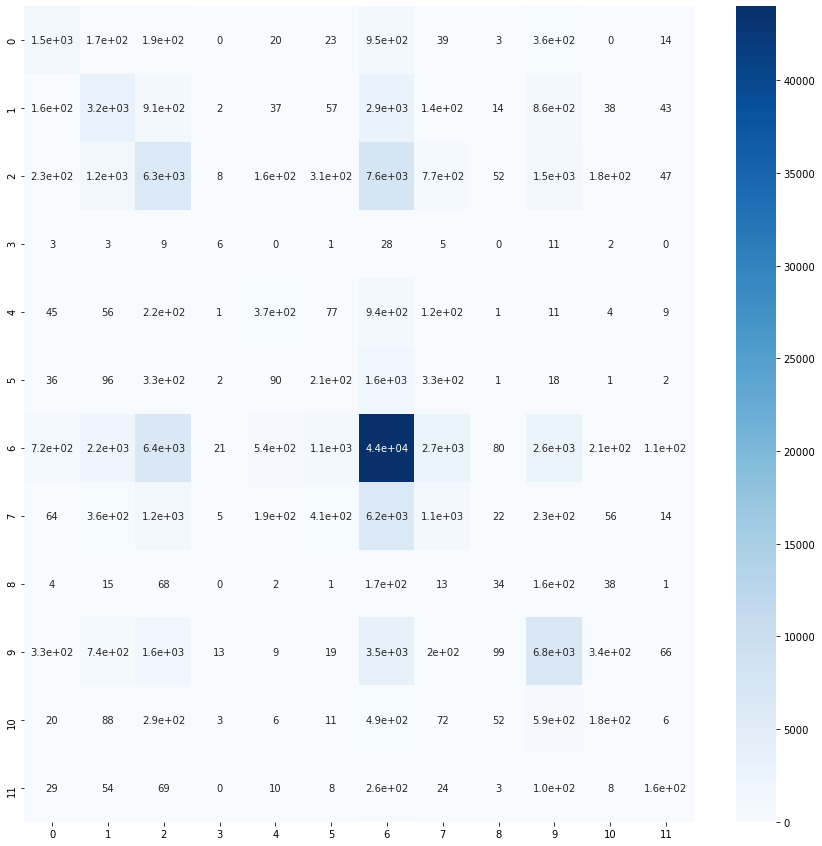

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
cf_matrix=confusion_matrix(y_val,y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues',ax=ax)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.5232990772155841

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47      3290
           1       0.39      0.39      0.39      8394
           2       0.36      0.34      0.35     18382
           3       0.10      0.09      0.09        68
           4       0.26      0.20      0.23      1860
           5       0.10      0.08      0.09      2676
           6       0.64      0.72      0.68     60754
           7       0.19      0.11      0.14      9868
           8       0.09      0.07      0.08       511
           9       0.51      0.49      0.50     13673
          10       0.17      0.10      0.13      1811
          11       0.34      0.22      0.27       735

    accuracy                           0.52    122022
   macro avg       0.30      0.27      0.28    122022
weighted avg       0.50      0.52      0.51    122022

